# Pennsylvania Deer Related Crash Analysis 

1. Executive Summary

2. Data Introduction

3. Libraries

4. Reading the Data

5. EDA

6. Summary 

7. Advisement

## 1. Executive Summary

Having come from Taiwan to pursue a master's degree in Philadelphia, my first day in Pennsylvania proved to be unsettling as I witnessed a tragic incident where a severely deformed deer lay lifeless by the roadside, covered in blood. In Taiwan, deer are cherished animals and are protected by the government, often found in the comforting confines of zoo enclosures. Motivated by this jarring experience, I am now determined to gather statistics on such occurrences in Pennsylvania and explore measures to safeguard both humans and deer.

## 2. Data Introduction

The dataset used for this analysis has been compiled from the Pennsylvania Department of Transportation's official website. PennDOT's cash database provides comprehensive information on various aspects of crash, including road networks, geographic location, type, time, severity, and more. The dataset covers a time range from 2007 to 2021, enabling a long-term perspective on the state's transportation trends. I have taken out the columns I need and saved them as a new csv file named deer_data_to_analysis.

PennDOT's cash data : https://pennshare.maps.arcgis.com/apps/webappviewer/index.html?id=8fdbf046e36e41649bbfd9d7dd7c7e7e


## 3. Libraries

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

## 4. Reading the Data

In [2]:

file_path = "deer_data_to_analysis.csv"
data_to_analysis = pd.read_csv(file_path)

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_22132\4185081975.py:2: DtypeWarning: Columns (19,20,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data_to_analysis = pd.read_csv(file_path)


In [3]:
data_to_analysis.head()

,BELTED_DEATH_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,CRASH_YEAR,CRN,DAY_OF_WEEK,DISTRICT,FATAL_COUNT,HOUR_OF_DAY,...,LANE_COUNT,OFFSET,RDWY_COUNTY,RDWY_ORIENT,RDWY_SEQ_NUM,ROAD_OWNER,ROUTE,SEGMENT,SPEED_LIMIT,STREET_NAME
0,0,5,43,1,2007,2007000008,2,1,0,1.0,...,2.0,523.0,43.0,U,3.0,2.0,0318,70.0,40.0,MAIN ST
1,0,5,43,1,2007,2007000009,2,1,0,1.0,...,2.0,523.0,43.0,U,3.0,2.0,0318,70.0,40.0,MAIN ST
2,0,7,36,1,2007,2007000010,2,8,0,6.0,...,2.0,25.0,36.0,W,3.0,2.0,1010,190.0,45.0,MARTINDALE RD
3,0,7,46,1,2007,2007000013,2,6,0,7.0,...,2.0,2469.0,46.0,E,3.0,2.0,0063,462.0,45.0,WELSH RD
4,0,4,15,1,2007,2007000017,2,6,0,11.0,...,2.0,1763.0,15.0,B,3.0,2.0,0724,152.0,45.0,NEW SCHUYLKILL RD


### 4.1 An Overview from the Data

Use ProfileReport to have a overall concept of data

In [1]:
#ProfileReport(data_to_analysis, title="Profiling Report")

## 5. EDA

### The most important variable : DEER_RELATED

DEER_RELATED: Deer Struck or Deer in Roadway

* What the Proportion of accidents involving deer in the most recent data(2021)?

In [39]:
data_2021 = data_to_analysis[(data_to_analysis["CRASH_YEAR"] == 2021)]

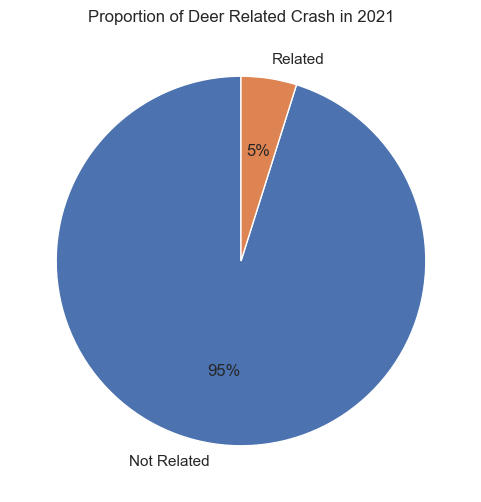

In [63]:
# Calculate the percentage of occurrences of 0s and 1s in the DEER_RELATED column
percentage_counts = data_2021['DEER_RELATED'].value_counts(normalize=True) * 100

# Convert the percentage_counts into a DataFrame
df_percentage = pd.DataFrame({'DEER_RELATED': percentage_counts.index, 'Percentage': percentage_counts.values})

# Create a pie plot using Seaborn
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.set_palette('pastel')  # Optional: Set the color palette
sns.set(style='whitegrid')  # Optional: Set the style

plt.pie(df_percentage['Percentage'],  labels=['Not Related', 'Related'], autopct='%1.0f%%', startangle=90)

plt.title('Proportion of Deer Related Crash in 2021')
plt.show()

* The changes(count) of accidents involving deer

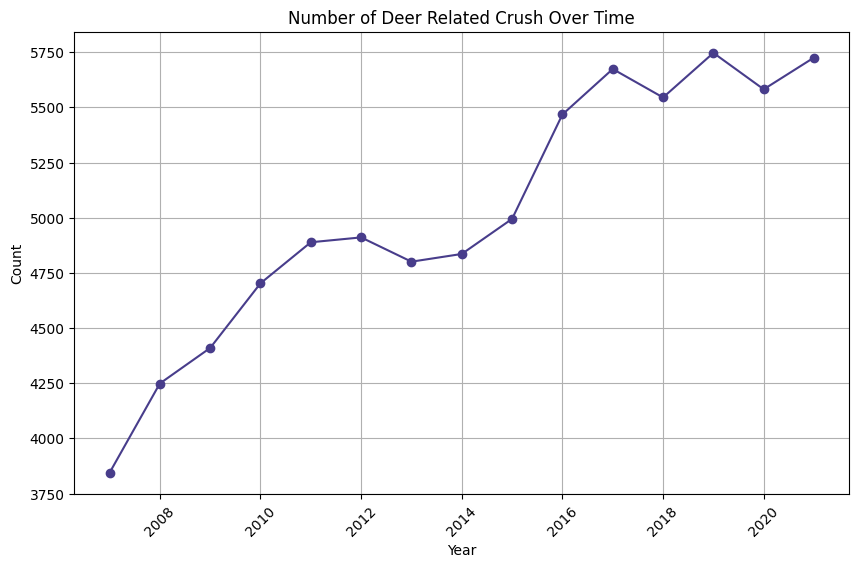

In [80]:
# Filter the DataFrame to get only the rows where DEER_RELATED == 1
deer_related_df = data_to_analysis[data_to_analysis['DEER_RELATED'] == 1]

# Group by CRASH_YEAR and count the number of occurrences for each year
deer_related_count_by_year = deer_related_df.groupby('CRASH_YEAR')['DEER_RELATED'].count()
plt.figure(figsize=(10, 6))  
plt.plot(deer_related_count_by_year.index, deer_related_count_by_year.values, marker='o', linestyle='-', color = 'darkslateblue')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Deer Related Crush Over Time')

plt.grid(True)
plt.xticks(rotation=45)  

plt.show()

The number of deer-related crash has continued to rise since 2007, and has remained between 5,500 and 5,800 per year since 2017. By 2021, deer-related crash accounts for 5% of all type of crash.

Is the population of deer is climbing too?

I didn't find any data to prove whether the population of deer increase over time. However, Game Commission Deer and Elk Section Supervisor David Stainbrook said that’s noteworthy because the buck harvest is considered a good indicator of the overall deer population trend. If the buck harvest is climbing, the deer population likely is, too. If it’s dropping, the population probably mirrors that. If it’s stable, the population likely is as well, though, if hunter numbers are declining, a stable antlered harvest trend may actually indicate an increasing population trend.

* How serious the deer related crash were?

MAX_SEVEIRTY_LEVEL: Injury severity level of the crash 

0 – Property Damage Only 

1 – Fatal 

2 – Suspected Serious Injury 

3 – Suspected Minor Injury 

4 – Possible Injury 

8 – Injury – Unknown Severity 

9 – Unknown if Injured 

In [64]:
deer_related_df_severity = deer_related_df

severity_mapping = {
    0: 'Property Damage Only',
    1: 'Fatal',
    2: 'Suspected Serious Injury',
    3: 'Suspected Minor Injury',
    4: 'Possible Injury',
    8: 'Injury – Unknown Severity',
    9: 'Unknown if Injured'
}

#transform the MAX_SEVEIRTY_LEVEL column using the mapping dictionary
deer_related_df_severity['MAX_SEVERITY_LEVEL'] = deer_related_df_severity['MAX_SEVERITY_LEVEL'].map(severity_mapping)

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_22132\3589637365.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deer_related_df_severity['MAX_SEVERITY_LEVEL'] = deer_related_df_severity['MAX_SEVERITY_LEVEL'].map(severity_mapping)


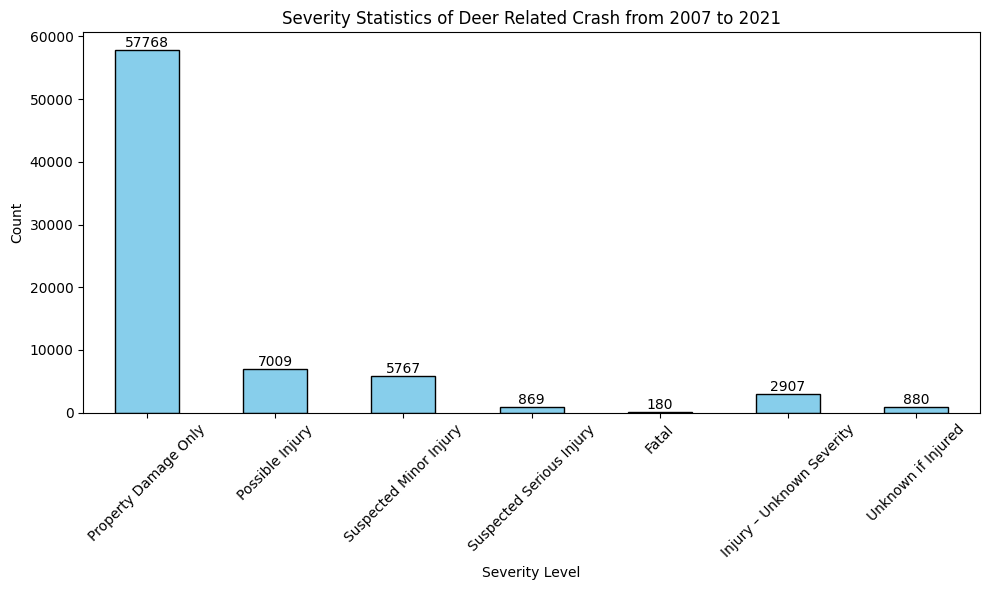

In [65]:
# Define the desired order of categories
desired_order = [
    'Property Damage Only',
    'Possible Injury',
    'Suspected Minor Injury',
    'Suspected Serious Injury',
    'Fatal',
    'Injury – Unknown Severity',
    'Unknown if Injured'
]


plt.figure(figsize=(10, 6))
ax = deer_related_df_severity['MAX_SEVERITY_LEVEL'].value_counts().loc[desired_order].plot(kind='bar', color='skyblue', edgecolor='black')

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Severity Statistics of Deer Related Crash from 2007 to 2021')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It seems that the consequence of most deer related accidents were property damage or minor injury, but there were still people seriously injured or even killed

* Deer related crash distribution in Pennsylvania

In [17]:
# Zipping locations
lats = list(deer_related_df.query('CRASH_YEAR == 2021')['DEC_LAT'].dropna().values)
longs = list(deer_related_df.query('CRASH_YEAR == 2021')['DEC_LONG'].dropna().values)
locations = list(zip(lats, longs))
# Creating a mapa using folium
map1 = folium.Map(location=[40, -77.5], tiles = "OpenStreetMap", zoom_start = 7)
# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1


I'm shocked that big cities like Pittsburgh, Harrisburg, and even Philadelphia, and their surrounding areas, have so many deer-related accidents, far more than the countryside. In fact, I didn't know that deer will also appear around cities. 

* When is more likely to happen deer related crash?

1. HOUR_OF_DAY

In [76]:
deer_related_df_hour = deer_related_df[(deer_related_df["HOUR_OF_DAY"] != 99)] #99 means the hour of day is unknown

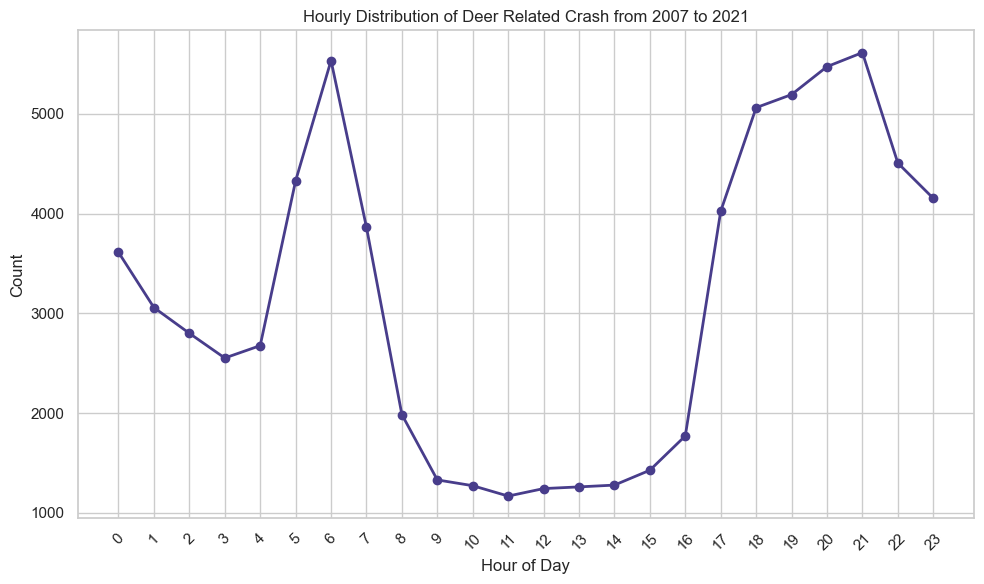

In [84]:

hourly_counts = deer_related_df_hour ['HOUR_OF_DAY'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='line', marker='o', color='darkslateblue', linewidth=2)

plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Hourly Distribution of Deer Related Crash from 2007 to 2021')
plt.xticks(hourly_counts.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

It is not sure whether the accident related to deer is caused by the fact that deer are more active at night (17:00 - 6:00) or because it is caused by the increase in traffic and people's rush during commuting time. I think it has something to do with both role and there may have interaction effect, further analysis to confirm. 

2. DAY_OF_WEEK

DAY_OF_WEEK 

1 – Sunday 

2 – Monday 

3 – Tuesday 

4 – Wednesday 

5 – Thursday 

6 – Friday 

7 - Saturday 

9 – Unknown

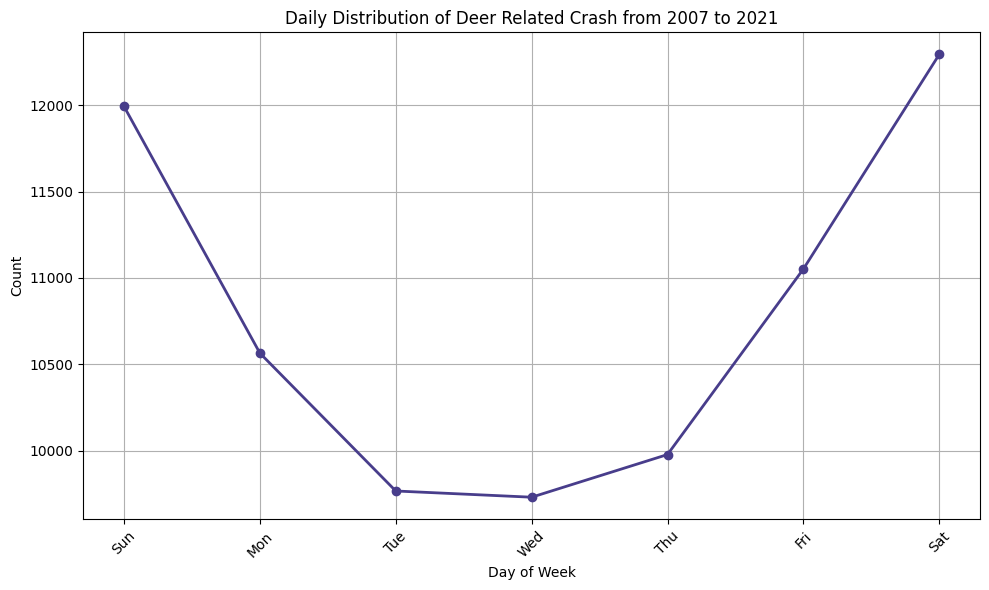

In [19]:
daily_counts = deer_related_df[deer_related_df['DAY_OF_WEEK'].isin([1,2,3,4,5,6,7])]["DAY_OF_WEEK"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='darkslateblue', linewidth=2)
plt.xticks(daily_counts.index, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Daily Distribution of Deer Related Crash from 2007 to 2021')
plt.grid(True)
plt.tight_layout()
plt.show()

The difference in numbers between weekends and weekdays is not that big but there is a pattern that more deer-related crashes happened on weekends.

In [33]:
import scipy.stats as st

3. CRASH_MONTH

In [14]:
deer_related_df_month = deer_related_df

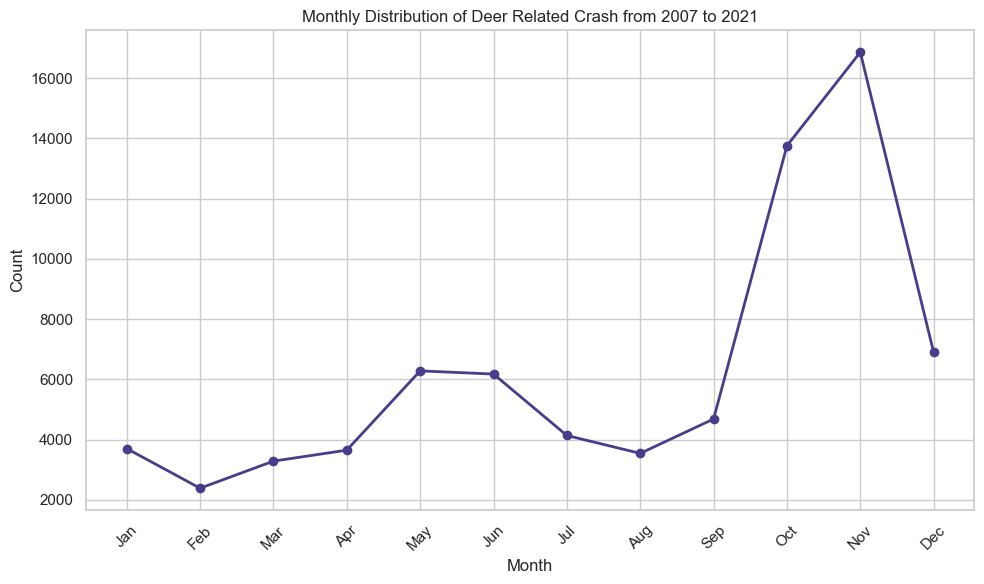

In [91]:

monthly_counts = deer_related_df_month['CRASH_MONTH'].value_counts().sort_index()

# Step 3: Plot the line plot
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o', color='darkslateblue', linewidth=2)

# Rename x-ticks for months (assuming CRASH_MONTH is represented as 1-12 for Jan-Dec)
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution of Deer Related Crash from 2007 to 2021')
plt.grid(True)
plt.tight_layout()
plt.show()

 Paul Peditto, director of the Wildlife and Heritage Service at the agency, said deer activity “increases significantly” from mid-October through November as they’re breeding and that results in “more motorist encounters with deer.” I also read that during mating season, deer are less aware of their surroundings and they jump in front of cars causing accidents. The graph perfectly explain it. 

* Which municipalities should pay more attention on deer related accident?

In [54]:
median_municipal = deer_related_df['MUNICIPALITY'].value_counts().median()
print(f"The median count of deer related crash in municipal is {median_municipal:.1f}")

The median count of deer related crash in municipal is 18.0


In [58]:
deer_related_df['MUNICIPALITY'].value_counts().head(5)

64209    422
2301     325
45101    314
45215    279
10212    264
Name: MUNICIPALITY, dtype: int64

Top five municipalities with the most deer-related crashes from 2007 to 2021:

64209 - Hempfield Twp

02301 - Pittsburgh City 

45101 - Pocono Twp 

45215 - Tobyhanna Twp 

10212 - Cranberry Twp 

* Which district happened more deer related accidents?

DISTRICT: District Number where crash occurred 

01 – District 1 (Crawford, Erie, Forest, Mercer, Venango, Warren Counties)  

02 – District 2 (Cameron, Centre, Clearfield, Clinton, Elk, Juniata, McKean, Mifflin, Potter Counties)  

03 – District 3 (Bradford, Columbia, Lycoming, Montour, Northumberland, Snyder, Sullivan, Tioga, Union Counties)  

04 – District 4 (Lackawanna, Luzerne, Pike, Susquehanna, Wayne, Wyoming Counties)  

05 – District 5 (Berks, Carbon, Lehigh, Monroe, Northampton, Schuylkill Counties)  

06 – District 6 (Bucks, Chester, Delaware, Montgomery, Philadelphia Counties)  

08 – District 8 (Adams, Cumberland, Dauphin, Franklin, Lancaster, Lebanon, Perry, York Counties)  

09 – District 9 (Bedford, Blair, Cambria, Fulton, Huntington, Somerset Counties)  

10 – District 10 (Armstrong, Butler, Clarion, Indiana, Jefferson Counties)  

11 – District 11 (Allegheny, Beaver, Lawrence Counties)  

12 – District 12 (Fayette, Greene, Washington, Westmoreland Counties) 

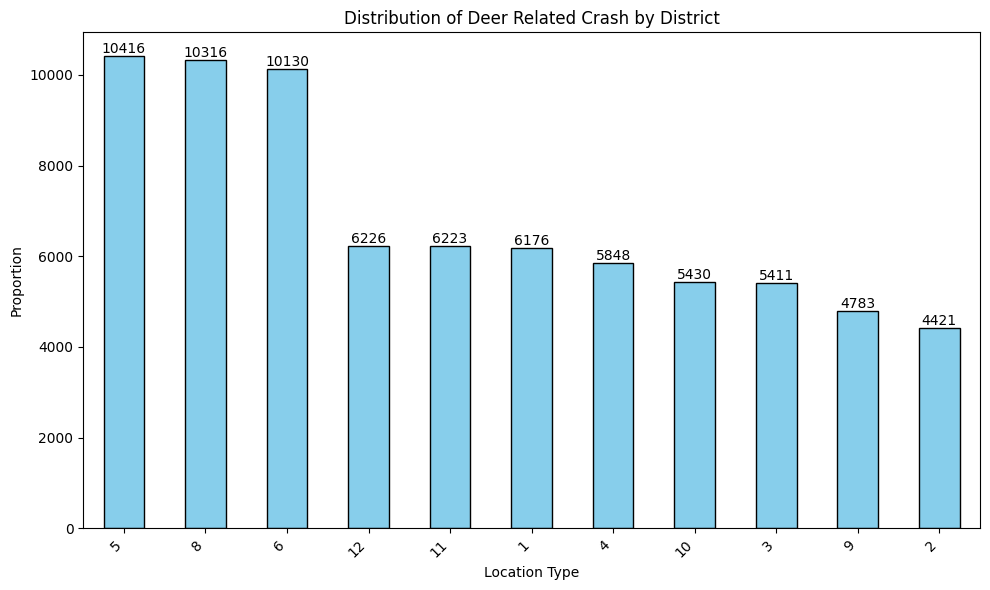

In [70]:


# Step 3: Calculate the proportion of each category
district_proportions = deer_related_df['DISTRICT'].value_counts()

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
district_proportions.plot(kind='bar', color='skyblue', edgecolor='black')

# Annotate the bars with proportions
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Location Type')
plt.ylabel('Proportion')
plt.title('Distribution of Deer Related Crash by District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Relation between speed limit and number of deer-related crash

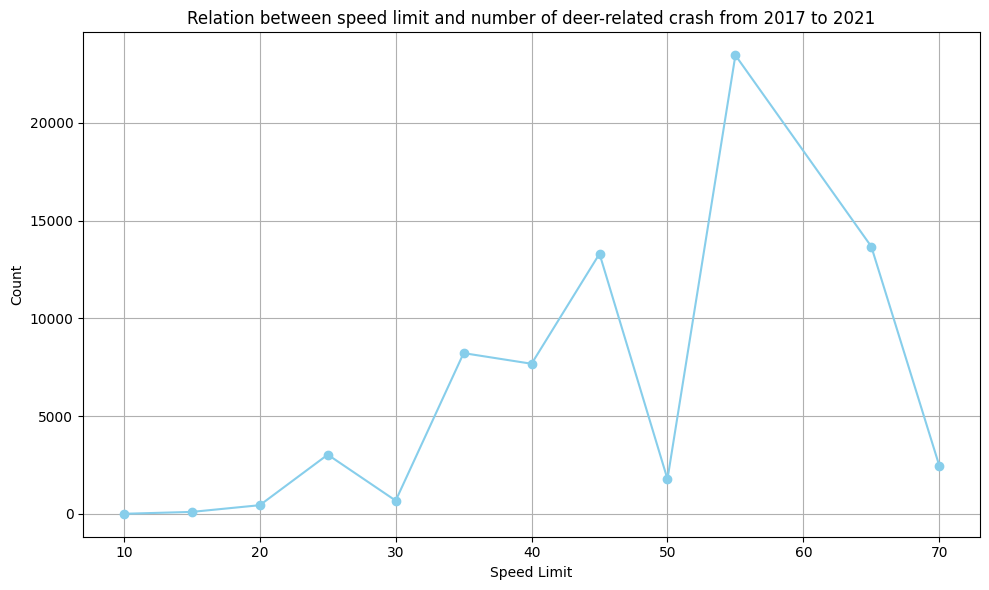

In [77]:
speed_limit_counts = deer_related_df['SPEED_LIMIT'].value_counts().sort_index()

# Step 2: Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(speed_limit_counts.index, speed_limit_counts.values, marker='o', color='skyblue', linestyle='-')

plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.title('Relation between speed limit and number of deer-related crash from 2017 to 2021')
plt.grid(True)
plt.tight_layout()
plt.show()

It seems that higher speed limits linked to higher chance of deer-related crash.

## 6. Summary 

* The number of deer-related crashes has continued to rise since 2007 and has remained between 5,500 and 5,800 per year since 2017. By 2021, deer-related crash accounts for 5% of all type of crash.

* The consequences of most deer-related accidents were property damage or minor injury, but there were still people seriously injured or even killed

* Big cities like Pittsburgh, Harrisburg, and even Philadelphia, and their surrounding areas, have many deer-related crashes, far more than the countryside.

* Not sure whether the accident related to deer is caused by the fact that deer are more active at night (17:00 - 6:00) or because it is caused by the increase in traffic and people's rush during commuting time. I think it has something to do with both roles and there may have an interaction effect, further analysis is needed to confirm. 

* The difference in numbers between weekends and weekdays is not that big but there is a pattern that more deer-related crashes happened on weekends.

* More crashes happened from mid-October to November. This is because of the deer's mating season and deer are less aware of their surroundings and they jump in front of cars causing accidents.

* Hempfield Twp, Pittsburgh City, Pocono Twp, Tobyhanna Twp, and Cranberry Twp are the top five municipalities with the most deer-related crashes from 2007 to 2021. District 5 (Berks, Carbon, Lehigh, Monroe, Northampton, and Schuylkill Counties) in Pennsylvania have the most deer-related crashes from 2007 to 2021. 

* Higher speed limits are linked to a higher chance of deer-related crashes.

## 7. Advisement

* Deer Awareness Campaigns: Given the continuous rise in deer-related crashes, it is essential for the Pennsylvania Department of Transportation to launch awareness campaigns targeted at both drivers and residents. These campaigns should educate drivers about the increased risk of encountering deer during specific times of the year and in certain areas. Residents should also be encouraged to take precautions to avoid deer collisions, such as reducing speed in deer-prone areas and reporting any sightings of deer near roadways.

* Focus on High-Risk Areas: The analysis shows that big cities and their surrounding areas have a higher frequency of deer-related crashes. It is crucial to focus road safety efforts on these areas, implementing measures like improved road signage, increased police presence, and the installation of wildlife crossings or fencing in areas with high deer populations.

* Nighttime Safety Measures: The data suggests that a significant number of deer-related crashes occur during nighttime hours. Implementing additional safety measures, such as better road lighting, reflective road markings, and educational campaigns reminding drivers to be cautious during low-light conditions, could help reduce these incidents.

* Weekend Patrols: While the difference in crash numbers between weekends and weekdays is not substantial, the observed pattern indicates that more deer-related crashes happen on weekends. Deploying additional patrols during weekends in areas prone to deer encounters could help mitigate accidents during these periods.

* Targeted Speed Limit Adjustments: The analysis reveals a correlation between higher speed limits and an increased likelihood of deer-related crashes. Consideration should be given to reevaluating speed limits in high-risk areas, especially where there is a known deer population, to reduce the risk of collisions and improve overall road safety.

* Wildlife Corridor Planning: Collaboration with environmental agencies and wildlife experts could help identify key wildlife corridors where deer frequently cross roads. By integrating this information into transportation planning, Pennsylvania can design and implement wildlife-friendly infrastructure, such as underpasses and overpasses, to reduce the risk of deer-vehicle collisions.

* Comprehensive Data Collection and Analysis: Further research and analysis are needed to investigate the interaction effects between deer behavior, traffic patterns, and commuter rush hours. Collecting more detailed data on deer movements and behavior, as well as traffic volume and congestion during specific timeframes, could provide valuable insights into the underlying causes of deer-related crashes.

* Public Reporting and Feedback System: Encouraging the public to report deer sightings near roadways and providing a platform for drivers to share their experiences with deer encounters can help raise awareness and contribute to data collection efforts.

By implementing these recommendations, Pennsylvania can take proactive steps to reduce deer-related crashes, enhance road safety, and protect both drivers and wildlife. Continual monitoring and evaluation of the effectiveness of these measures will be essential in ensuring their success and making further adjustments as needed.